In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

big_data = load_digits()
data = pd.DataFrame(big_data['data'])
target = pd.DataFrame(big_data['target'])
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


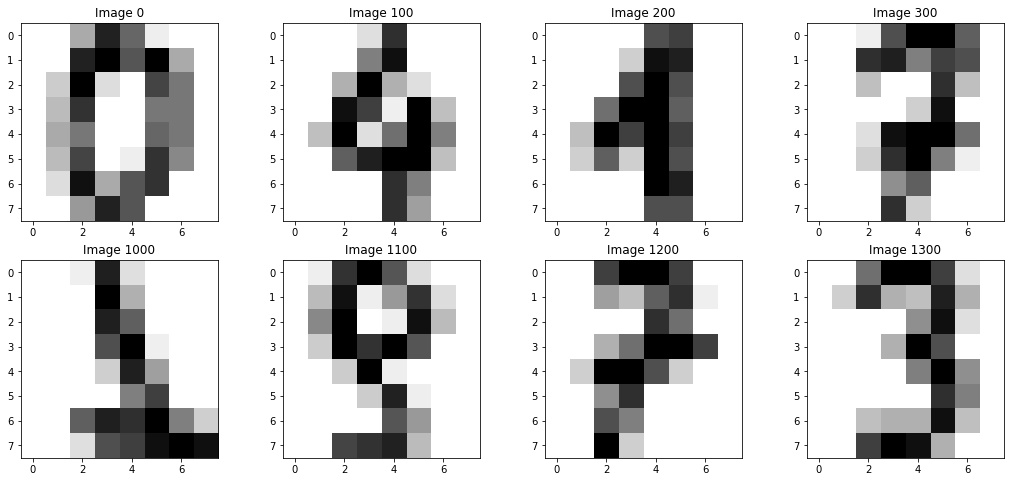

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2, 4, figsize = (18, 8))
axs[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axs[0,0].set_title('Image 0')
axs[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
axs[0,1].set_title('Image 100')
axs[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
axs[0,2].set_title('Image 200')
axs[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')
axs[0,3].set_title('Image 300')
axs[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
axs[1,0].set_title('Image 1000')
axs[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
axs[1,1].set_title('Image 1100')
axs[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
axs[1,2].set_title('Image 1200')
axs[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')
axs[1,3].set_title('Image 1300')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .2, random_state = 69)

def train(X_train, y_train, k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train.values.ravel())
    return model
        
def test(model, X_test, y_test):
    predictions = model.predict(X_test)
    return predictions
    
def cross_validate(k, cv):
    model = train(X_train, y_train, k)
    predictions = test(model, X_test, y_test)
    return cross_val_score(model, data, target, cv = cv, n_jobs = -1).round(4)

cv5_accuracies = []
print('These are the mean cross validation scores using 5 folds:')
for i in range(1,10):
    print('The mean cross validation score of the KNN model with {} neighbors is {}.'.format(i, np.mean(cross_validate(i, 5)).round(4)))
    cv5_accuracies.append(np.mean(cross_validate(i, 9)).round(4))
    
print("\n")
print('These are the mean cross validation scores using 10 folds:')

cv10_accuracies = []
for i in range(1,10):
    print('The mean cross validation score of the KNN model with {} neighbors is {}.'.format(i, np.mean(cross_validate(i, 10)).round(4)))
    cv10_accuracies.append(np.mean(cross_validate(i, 10)).round(4))
    
print("\n")
print('These are the mean cross validation scores using 15 folds:')

cv15_accuracies = []
for i in range(1,10):
    print('The mean cross validation score of the KNN model with {} neighbors is {}.'.format(i, np.mean(cross_validate(i, 15)).round(4)))
    cv15_accuracies.append(np.mean(cross_validate(i, 15)).round(4))

These are the mean cross validation scores using 5 folds:
The mean cross validation score of the KNN model with 1 neighbors is 0.9644.
The mean cross validation score of the KNN model with 2 neighbors is 0.9672.
The mean cross validation score of the KNN model with 3 neighbors is 0.9666.
The mean cross validation score of the KNN model with 4 neighbors is 0.9638.
The mean cross validation score of the KNN model with 5 neighbors is 0.9627.
The mean cross validation score of the KNN model with 6 neighbors is 0.9594.
The mean cross validation score of the KNN model with 7 neighbors is 0.9599.
The mean cross validation score of the KNN model with 8 neighbors is 0.9583.
The mean cross validation score of the KNN model with 9 neighbors is 0.9566.


These are the mean cross validation scores using 10 folds:
The mean cross validation score of the KNN model with 1 neighbors is 0.975.
The mean cross validation score of the KNN model with 2 neighbors is 0.9744.
The mean cross validation score of 

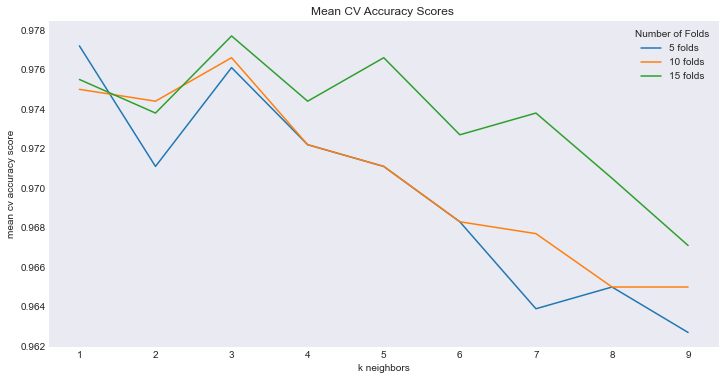

In [4]:
figure = plt.figure(figsize = (12, 6))
plt.style.use('seaborn-dark')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], cv5_accuracies)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], cv10_accuracies)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], cv15_accuracies)
plt.title('Mean CV Accuracy Scores ')
plt.xlabel('k neighbors')
plt.ylabel('mean cv accuracy score')
legend = plt.legend(['5 folds', '10 folds', '15 folds'], title = 'Number of Folds', fancybox = True)
plt.show()

Based on the data, it seems like to optimal number of neighbors is 3.

We will now train Neural Networks with one layer and 8, 16, 32, 64, 128, 256 neurons. We'll test the accuracy of our network using the mean cross validation scores gathered from our training and test data. 

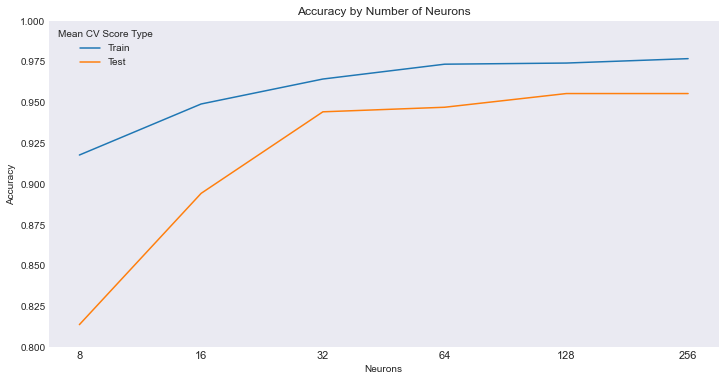

Train CV Scores [0.9179, 0.9492, 0.9645, 0.9736, 0.9743, 0.977]
Test CV Scores [0.8139, 0.8944, 0.9444, 0.9472, 0.9556, 0.9556]


In [5]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier

test_cv_scores = []
train_cv_scores = []

for i in [8, 16, 32, 64, 128, 256]:
    mlp = MLPClassifier(hidden_layer_sizes=(i,), activation='logistic')
    mlp.fit(X_train, y_train.values.ravel())
    train_cv_scores.append(np.mean(cross_val_score(mlp, X_train, y_train, cv = 4, n_jobs = -1)).round(4))
    test_cv_scores.append(np.mean(cross_val_score(mlp, X_test, y_test, cv = 4, n_jobs = -1)).round(4))

neurons = [8, 16, 32, 64, 128, 256]
figure = plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(len(neurons)), train_cv_scores)
plt.plot(np.arange(len(neurons)), test_cv_scores)
plt.xticks(np.arange(len(neurons)), labels = neurons, fontsize=11)
plt.legend(['Train', 'Test'], title = 'Mean CV Score Type')
plt.ylim(.800, 1.000)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Neurons')
plt.show()
    
print('Train CV Scores {}'.format(train_cv_scores))
print('Test CV Scores {}'.format(test_cv_scores))

There doesn't seem to be any overfitting when we have only one hidden layer.

We will now train Neural Networks with two layers and 8, 16, 32, 64 neurons. We'll test the accuracy of our network using the mean cross validation scores gathered from our training and test data. 

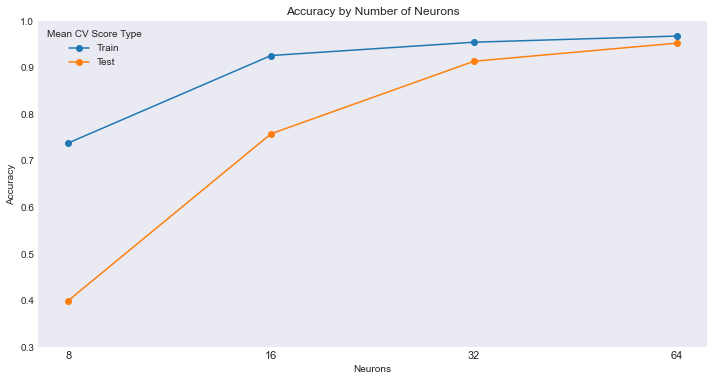

Train CV Scores [0.7384, 0.9262, 0.9548, 0.968]
Test CV Scores [0.4, 0.7583, 0.9139, 0.9528]


In [6]:
test_cv_scores = []
train_cv_scores = []

for i in [8, 16, 32, 64]:
    mlp = MLPClassifier(hidden_layer_sizes=(i,i), activation='logistic')
    mlp.fit(X_train, y_train.values.ravel())
    train_cv_scores.append(np.mean(cross_val_score(mlp, X_train, y_train, cv = 4, n_jobs = -1)).round(4))
    test_cv_scores.append(np.mean(cross_val_score(mlp, X_test, y_test, cv = 4, n_jobs = -1)).round(4))

neurons = [8, 16, 32, 64]
figure = plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(len(neurons)), train_cv_scores, marker = 'o')
plt.plot(np.arange(len(neurons)), test_cv_scores, marker = 'o')
plt.xticks(np.arange(len(neurons)), labels = neurons, fontsize=11)
plt.legend(['Train', 'Test'], title = 'Mean CV Score Type')
plt.ylim(.3, 1.0)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Neurons')
plt.show()

print('Train CV Scores {}'.format(train_cv_scores))
print('Test CV Scores {}'.format(test_cv_scores))

We will now train Neural Networks with three layers and 10, 64, 128 neurons. We'll test the accuracy of our network using the mean cross validation scores gathered from our training and test data. 

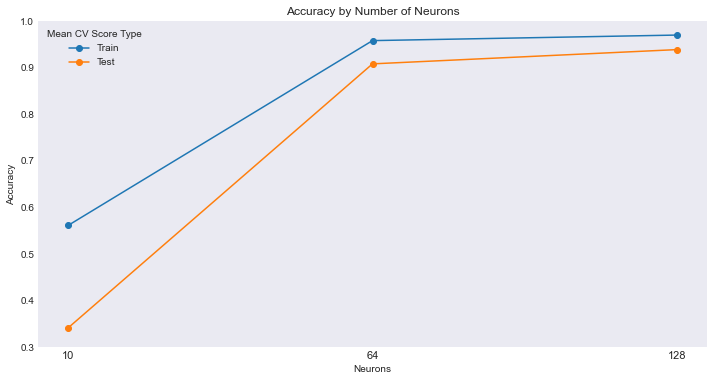

Train CV Scores [0.5616, 0.9582, 0.9701]
Test CV Scores [0.3417, 0.9083, 0.9389]


In [7]:
test_cv_scores = []
train_cv_scores = []

for i in [10, 64, 128]:
    mlp = MLPClassifier(hidden_layer_sizes=(i,i,i), activation='logistic')
    mlp.fit(X_train, y_train.values.ravel())
    train_cv_scores.append(np.mean(cross_val_score(mlp, X_train, y_train, cv = 4, n_jobs = -1)).round(4))
    test_cv_scores.append(np.mean(cross_val_score(mlp, X_test, y_test, cv = 4, n_jobs = -1)).round(4))

neurons = [10, 64, 128]
figure = plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(len(neurons)), train_cv_scores, marker = 'o')
plt.plot(np.arange(len(neurons)), test_cv_scores, marker = 'o')
plt.xticks(np.arange(len(neurons)), labels = neurons, fontsize=11)
plt.legend(['Train', 'Test'], title = 'Mean CV Score Type')
plt.ylim(.3, 1.0)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Neurons')
plt.show()

print('Train CV Scores {}'.format(train_cv_scores))
print('Test CV Scores {}'.format(test_cv_scores))